In [1]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed,MaxPooling1D, Flatten, Conv1D,Conv2D,Dropout, MaxPooling2D # for creating layers inside the Neural Network
from keras.optimizers import Adam , SGD
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import numpy.ma as ma
# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
from matplotlib import pyplot as plt

#file accessing
import os
# time stuff
from datetime import timedelta
import calendar


c:\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [2]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  #epochs.remove(max(epochs))
  
  #rmse.drop(max(rmse))
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


##### Read from file and establish dataframe and future functions

In [3]:
df=pd.read_csv('E:\DSFellowship\Complete\dataset2\dataset2.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y-%m-%d')
df=df.dropna(axis=0, how='all')#drop full nan rows

##### Remove next line to include all data

In [4]:
#df=df.iloc[500000:510000] #cuts data to long 120-119 approx
df

,,2014-11-08,2014-12-02,2014-12-26,2015-02-12,2015-03-08,2015-04-01,2015-04-25,2015-05-19,2015-06-12,2015-07-06,...,2018-10-18,2018-10-30,2018-11-11,2018-11-17,2018-11-23,2018-12-05,2018-12-17,2018-12-29,2019-01-10,2019-01-22
Longitude,Latitude,,,,,,,,,,,,,,,,,,,,,
-120.3387,36.5393,0.0,-6.2129,3.4247,5.7830,2.13990,6.8538,1.83540,2.1142,1.83670,-1.5935,...,4.93520,8.059200,6.39190,6.56470,3.58430,5.337900,7.14430,9.1285,8.73970,10.38400
-120.1908,36.1412,0.0,-5.6951,2.2257,4.5835,1.70790,6.5348,2.98530,2.7613,3.76730,2.2235,...,6.28560,8.606700,7.15330,8.06940,5.60730,4.977600,8.18450,9.0591,8.89620,10.35300
-119.8869,35.6171,0.0,-6.7674,1.8611,3.5773,0.77856,4.5700,1.90460,2.8225,0.89615,2.6578,...,6.42140,7.527900,6.25500,7.12750,7.43410,3.680000,6.77130,8.8868,7.87950,9.15160
-119.8849,35.8671,0.0,-6.9006,1.5378,3.1628,0.49591,5.3001,1.69690,2.4262,1.60660,1.9497,...,6.71270,8.195900,6.89780,7.72280,7.08070,5.015800,6.95200,8.8647,8.17390,9.19100
-119.8829,35.9512,0.0,-6.3572,1.1703,2.1735,-0.47235,3.9732,0.57705,1.4311,0.69616,1.1763,...,5.86560,7.390000,6.27260,7.15710,5.54560,3.736800,6.18420,7.5924,6.51850,8.10940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-118.9071,35.3750,0.0,-3.8828,-1.1999,-1.2152,-2.12550,-3.4199,-0.94401,-3.6226,0.56910,-1.4506,...,2.44230,2.689300,3.37490,3.22130,3.32230,2.285500,1.94290,5.8860,2.26160,2.42750
-118.9051,35.3430,0.0,-4.1356,-1.1255,-1.2232,-2.18530,-3.3244,-0.70324,-3.5807,0.53279,-1.5025,...,1.45350,1.393300,2.12930,1.83520,2.14240,1.547400,1.06060,4.7605,0.96871,1.18650
-118.9031,35.3110,0.0,-4.1879,-1.1213,-1.7977,-2.28030,-3.4793,-0.84339,-3.6445,0.30264,-2.1569,...,-0.17429,0.098737,0.56824,0.16814,0.69418,-0.011814,-0.57993,2.7450,-1.03220,-0.71361


# Timestep

In [5]:
timestep=10

# Shaping function (remove start and step for first for loop to include all data)

In [6]:
def shaping(datain, timestep):
    #print(arr)
    cnt=0
    for row in range(len(datain.index)): #picks a row at every iteration, allows to reduction of input and inclusion of multiple time series, remove start and step to run on full dataset 
    # Convert input dataframe to array and flatten
        #datain.iloc[row].fillna(datain.iloc[row].mean).to_numpy().flatten()
        arr=datain.iloc[row].interpolate().to_numpy().flatten() # flatten row
        #arr=arr.fillna(arr.mean)
        #arr=np.where(np.isnan(arr), ma.array(arr, mask=np.isnan(arr)).mean(), arr) 
        for mth in range(0, len(datain.columns)-(2*timestep)+1): # Define range lenght of the dates - 2* amount of timesep?? +1
            cnt=cnt+1 # Gives us the number of samples. Later used to reshape the data
            X_start=mth # Start month for inputs of each sample
            X_end=mth+timestep # End month for inputs of each sample
            Y_start=mth+timestep # Start month for targets of each sample. Note, start is inclusive and end is exclusive, that's why X_end and Y_start is the same number
            Y_end=mth+2*timestep # End month for targets of each sample.  
            
            # Assemble input and target arrays containing all samples
            if cnt==1:
                X_comb=arr[X_start:X_end]
                Y_comb=arr[Y_start:Y_end]
            else: 
                X_comb=np.append(X_comb, arr[X_start:X_end])
                Y_comb=np.append(Y_comb, arr[Y_start:Y_end])
    # Reshape input and target arrays
    X_out=np.reshape(X_comb, (cnt, timestep, 1))
    Y_out=np.reshape(Y_comb, (cnt, timestep, 1))
    return X_out, Y_out

##### Step 2 - Split and Shape data

In [7]:

#train, test = train_test_split(df, test_size=0.2)
# creates sequences to train
#Need to decide on how to deal with rows with nans in them

train, test=train_test_split(df,test_size=.2,shuffle=True,random_state=42)
X_train , Y_train = shaping(datain=train, timestep= timestep )
X_test, Y_test=shaping(test,10)


nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = Y_train.shape
Y_train = Y_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))
nsamples, nx, ny = Y_test.shape
Y_test = Y_test.reshape((nsamples,nx*ny))


##### Step 3 - Specify the structure of a Neural Network, first model

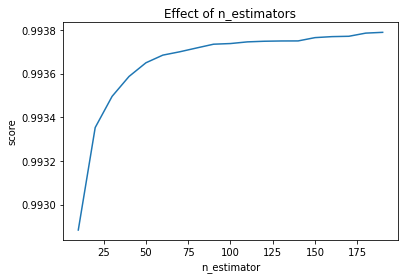

In [8]:
# set model
model = RandomForestRegressor(n_jobs = -1, random_state = 64)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)



In [9]:
pred_test=model.predict(X_test)

# pred_test = scaler2.inverse_transform(pred_test.reshape(-1, pred_test.shape[-1])).reshape(pred_test.shape)
y=pred_test.flatten()
z=[]
for x in range(910*95,910*96,10): #predictioon
    z.append(y[x])
z
b=Y_test.flatten() #Y test should match prediction
c=[] #wtf is this
for x in range(910*95,910*96,10):
    c.append(b[x])
y.size
X_test


array([[  0.     ,  -4.7151 ,   0.17761, ..., -10.041  , -13.85   ,
        -14.104  ],
       [ -4.7151 ,   0.17761,  -2.275  , ..., -13.85   , -14.104  ,
        -16.639  ],
       [  0.17761,  -2.275  ,  -5.6831 , ..., -14.104  , -16.639  ,
        -19.545  ],
       ...,
       [-64.783  , -64.338  , -67.615  , ..., -71.119  , -73.566  ,
        -74.752  ],
       [-64.338  , -67.615  , -66.738  , ..., -73.566  , -74.752  ,
        -73.18   ],
       [-67.615  , -66.738  , -67.916  , ..., -74.752  , -73.18   ,
        -76.641  ]])

In [10]:
# Plot (actual and predicted) for test (out of time) data
fig = go.Figure()

# #Trace for actual val
# fig.add_trace(go.Scatter(x=np.array(test.columns),
#                          y=np.array(test.values).flatten(),
#                          mode='lines',
#                          name='Subsidence - Actual (Test)',
#                          opacity=0.8,
#                          line=dict(color='black', width=1)
#                         ))
# fig.add_trace(go.Scatter(x=np.array(test.columns),
#                          y=e,
#                          mode='lines',
#                          name='Subsidence - Actual (YTrain)',
#                          opacity=0.8,
#                          line=dict(color='pink', width=1)
#                         ))

fig.add_trace(go.Scatter(x=np.array(test.columns[10:]),
                         y=c,
                         mode='lines',
                         name='Subsidence - Actual (YTest)',
                         opacity=0.8,
                         line=dict(color='grey', width=1)
                        ))


# Trace for predicted 
fig.add_trace(go.Scatter(x=np.array(test.columns[10:]),
                         y=z,
                         mode='lines',
                         name='Subsidence - Predicted ',
                         opacity=0.8,
                         line=dict(color='red', width=1)
                        ))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Month-Year'
                )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Subsidence'
                )

# Set figure title
fig.update_layout(title=dict(text="Subsidence", font=dict(color='black')),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                 )
fig.show()

In [11]:
# from sklearn import tree
# Tree = model.estimators_[5]
# plt.figure(figsize=(25,15))
# tree.plot_tree(Tree,filled=True, 
#               rounded=True, 
#               fontsize=14);

Scores:Return the coefficient of determination of the prediction. R^2

In [12]:
scores

[0.9928840954021881,
 0.9933530213398442,
 0.9934958001944636,
 0.9935867597089609,
 0.993649375970938,
 0.9936844222910356,
 0.9936996918865818,
 0.993717203112508,
 0.9937343849983222,
 0.9937374083632043,
 0.9937450202416459,
 0.9937479348668339,
 0.9937491856570176,
 0.9937494079723583,
 0.9937645033712345,
 0.9937690649792964,
 0.9937706496011358,
 0.9937851300284308,
 0.9937886991365728]

##### Train model

##### Step 4 - Plot loss over epochs

In [13]:
# Predicting the target values of the test set
Y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '.3f'))
print("\nRMSE: ", rmse)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



RMSE:  1.843
Mean Absolute Error: 1.2489224197215247
Mean Squared Error: 3.3974197874139795
Root Mean Squared Error: 1.8432091002959972


In [14]:
# Calculate the absolute errors
errors = abs(Y_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.25 degrees.
Accuracy: 104.72 %.


c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



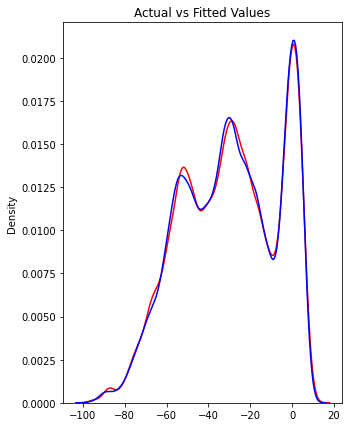

In [15]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()

In [16]:
##### Step 5 - Print Performance Summary